In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Seabornにサンプルデータがあります。
tips = sns.load_dataset("tips")

In [3]:
tips.head()  #size: 会計したそのグループの人数。  tatal_bill : 会計金額

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


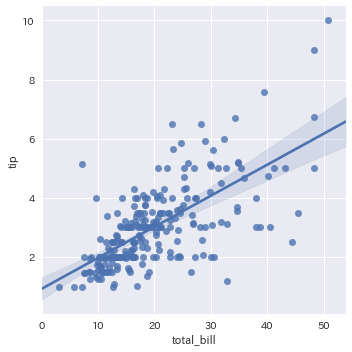

In [4]:
# lmplot() ｘ=total_bill y=tipsでプロットします。  回帰直線も同時に描いてくれる。
sns.lmplot("total_bill","tip",tips)  # shadowは信頼区間

In [5]:
sns.lmplot(tips["total_bill"], tips["tip"])  # DataFrame出ないとできない！

TypeError: lmplot() missing 1 required positional argument: 'data'

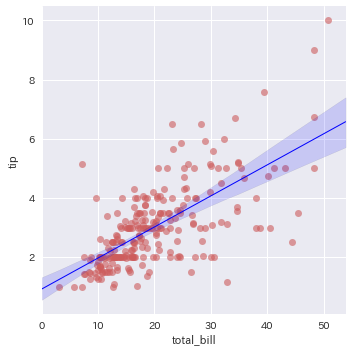

In [6]:
# グラフごとにパラメータを変えられます。
sns.lmplot("total_bill","tip",tips,
                   scatter_kws={'marker':'o', 'color':'indianred', "alpha": 0.6},
                   line_kws={'linewidth':1, 'color':'blue'})

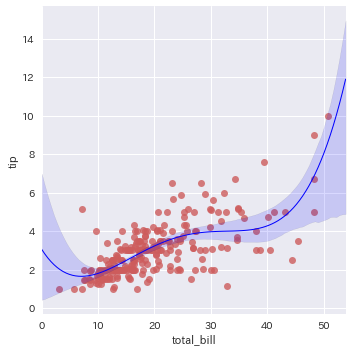

In [7]:
# 4次関数で回帰曲線をひくこともできます。  default は order=1
sns.lmplot("total_bill", "tip", tips, order=4,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"})

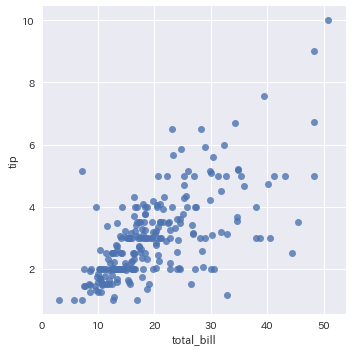

In [8]:
# 単なるプロットもできます。 散布図が欲しい時は fit_reg = False とすれば回帰直線がかかれなくて済む
sns.lmplot("total_bill", "tip", tips,fit_reg=False)

In [3]:
# 離散的な値でもlmplot()は使えます。

# チップの割合を計算し、DataFrameに追加する。
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


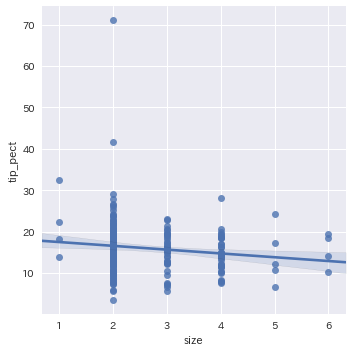

In [10]:
sns.lmplot("size", "tip_pect", tips)  # sns.lmplot(x="size", y="tip_pect", data=tips)はだめ キーワード引数にそんなものない。

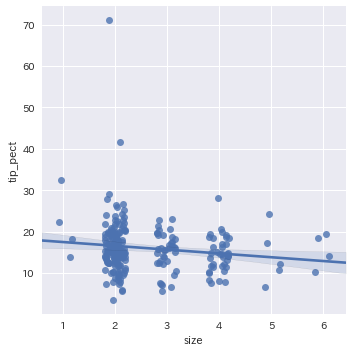

In [19]:
sns.lmplot("size", "tip_pect", tips, x_jitter=0.2)  # 上の図で、データがたくさん固まっているので、見やすくするためにx_jitterを指定する。

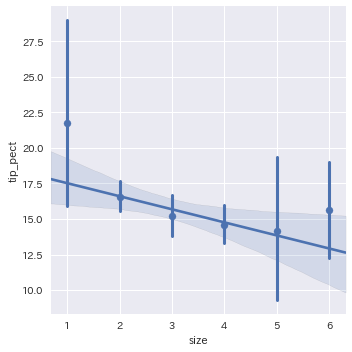

In [7]:
# 特定の推定量を描画することもできます。  x_estimator はx軸ごとの値に関数を適用してくれる。(今だと平均値)　x軸が離散的な値の時に役に立つ。
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);  # 棒は四分位？ 信頼区間かも

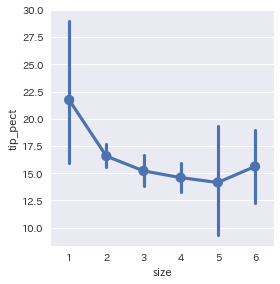

In [8]:
sns.factorplot("size", "tip_pect", data=tips, estimator=np.mean)  # pointplot のestimateには様々な統計関数がとれ、信頼区間までプロットしてくれる。

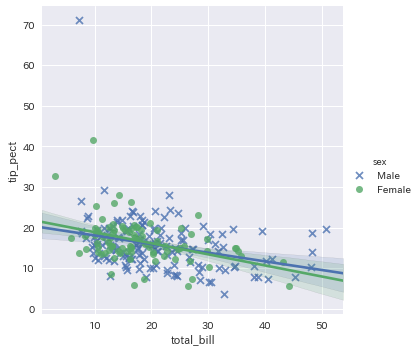

In [22]:
# hueが便利です。  hue=...で指定した列に対して値（カテゴリー）ごとに層別化してデータを描いてくれる。
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

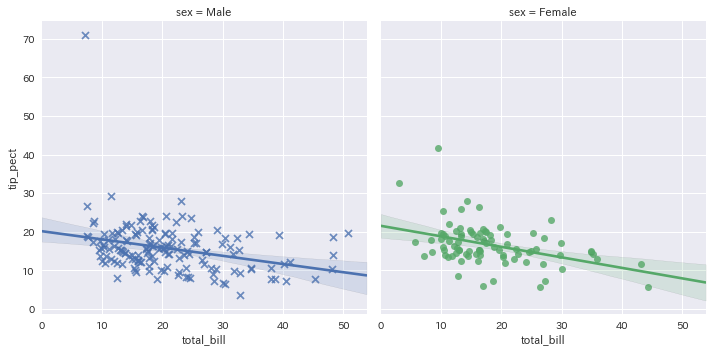

In [21]:
sns.lmplot("total_bill", "tip_pect", tips, hue="sex", col="sex", markers=["x","o"])

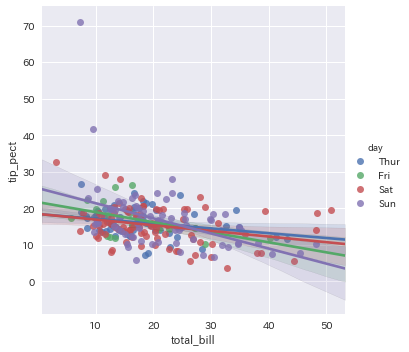

In [23]:
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

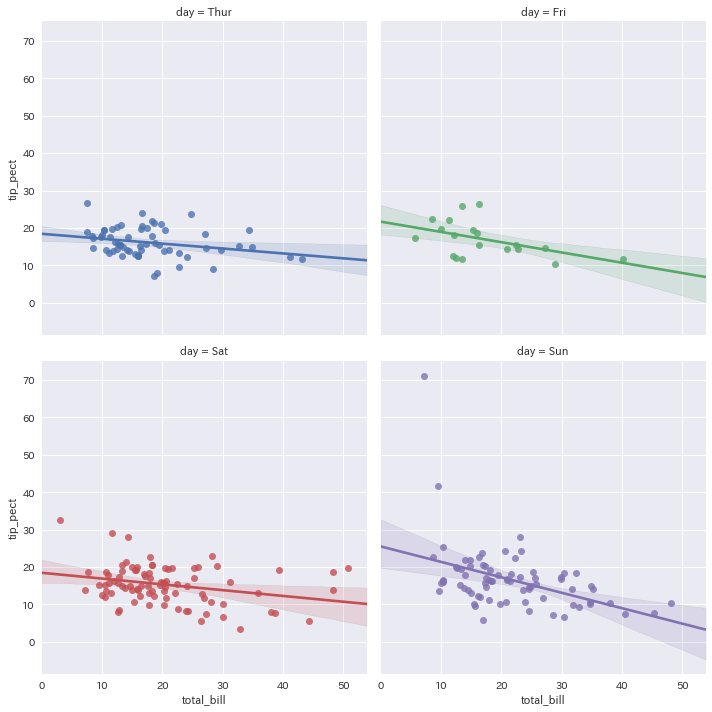

In [25]:
sns.lmplot("total_bill", "tip_pect", tips, hue="day", col="day", col_wrap=2)

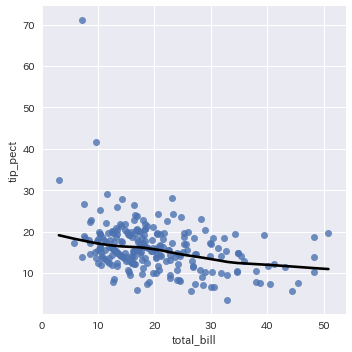

In [26]:
# LOESS(回帰直線を滑らかにする方法, 局所的に回帰曲線を求める）の説明（英語）です。
url = 'http://en.wikipedia.org/wiki/Local_regression'
sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

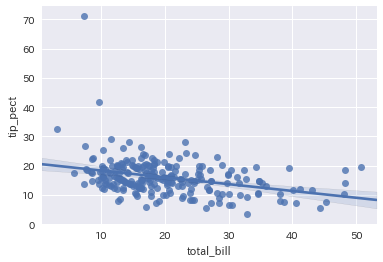

In [16]:
# lmplot() は実は、もっと低レベルな関数regplotを使っています。
sns.regplot("total_bill","tip_pect",tips)

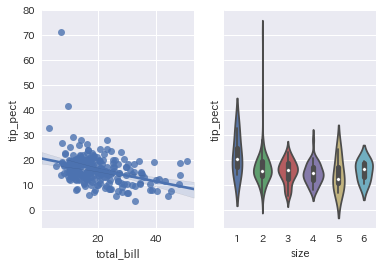

In [17]:
# 描画のエリアを分割することもできます。 複数の図をmatplotlibを用いてかく。  seaborn とmatplotlibは仲がいい。
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True)  # 1行２列の　figureで　y軸を共有する（sharey=True)   axis１は右　axis2は左の図をさす。 figは図のインスタンス
 
sns.regplot("total_bill","tip_pect",tips,ax=axis1)  
sns.violinplot(y='tip_pect', x='size', data=tips.sort_values('size') ,ax=axis2)